**1. Load JSON file**<Br>
**2. Data Exploration and Visualization**<br>
**3. Select variables and Convert into CSV**<br>
**4. Text Preprocessing**
> a) Change to lower cases<Br>
> b) Transform links (tentative?)<br>
> c) Remove punctuation<br>
> d) Remove stop words<br>
> e) Stem words (to root forms)<br>
  

## **1. Loading JSON file**

In [1]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
inline_rc = dict(mpl.rcParams)
from tqdm import tqdm

In [3]:
#True: all data (about 8 mil), False: 100,000 data
full_data = False

reviews = []
with open('data/yelp_academic_dataset_review.json') as f:
#    f = subset(f, stars != 3)
    for i, line in tqdm(enumerate(f)):
        reviews.append(json.loads(line))
        if full_data==False and i+1 >= 500000:
            break

df_review = pd.DataFrame(reviews)
df_review.tail()

495232it [00:06, 73978.51it/s]


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
499995,IhNASEZ3XnBHmuuVnWdIwA,6,2015-09-16 20:35:38,3,WNOssTyTI6n_ujQgvC-HVw,5.0,"Other than Kung Fu Tea, I haven't had amazing ...",8,C_CqWSkpn2aOnUXtHx0-iw
499996,IhNASEZ3XnBHmuuVnWdIwA,3,2018-11-24 20:09:14,2,7KIqIT0LVr6CWD2U-rph9Q,5.0,I wish they had one in the westside or for thi...,5,9-YU-svmnMfKs_DkcZc0Tg
499997,7HbKKqXtZUjf6uVSHZ8wyw,0,2019-04-20 00:16:42,0,rl1GMcBPXipF0eWi7jk-eA,5.0,This will be our new favorite spot. Dylan our ...,0,6ex5OsJkv1wugjL9BmG9jQ
499998,DvelUmIuBmfbt95frynYsA,0,2019-03-29 20:59:54,0,K4sTnu0SxtGrtuyMBXPfrw,3.0,"3.5 Stars\n\nEnvironment: The decor is poor, f...",1,7A00Z3xfN7gjp4RcOeWdfQ
499999,lmxA0dJM0XsPCIHPXhEQ-g,0,2016-09-01 22:27:17,0,GtyzHp0CG3qhWWDpXROoUw,5.0,I want to tell everyone about an experience I ...,0,jK1ofUrIeJEDZ-6NxA28Gw


In [4]:
#first 100,000 business data

biz=[]
with open('data/yelp_academic_dataset_business.json') as f1:
    for i, line in tqdm(enumerate(f1)):
        biz.append(json.loads(line))
        if full_data==False and i+1 >= 500000:
            break
df_biz = pd.DataFrame(biz)
df_biz.tail()

209393it [00:05, 38800.74it/s]


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
209388,9750 Weston Road,"{'HasTV': 'False', 'GoodForKids': 'True', 'Out...",9Q0fPWAjUweoFDk0kafuzQ,"Japanese, Sushi Bars, Restaurants",Vaughan,"{'Thursday': '11:0-22:0', 'Saturday': '11:0-22...",0,43.838555,-79.559823,Nishi Sushi,L4H 2P2,5,4.0,ON
209389,3240 Wilkinson Blvd,"{'BusinessParking': '{'garage': False, 'street...",PotiAhtDMYMNsJCzV0oLAw,"Department Stores, Food, Mobile Phones, Fashio...",Charlotte,None,0,35.226307,-80.893539,Walmart,28208,13,2.0,NC
209390,7014-590 E Camelback Rd,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...",SYa2j1boLF8DcGVOYfHPcA,"American (New), Food, Burgers, Restaurants, Fa...",Scottsdale,"{'Thursday': '11:0-22:0', 'Saturday': '11:0-22...",1,33.504062,-111.929431,Five Guys,85251,97,3.5,AZ
209391,,None,RSSIsgO00OuWQTRoITacpA,"Pet Services, Pet Training, Pets",Indian Trail,"{'Thursday': '7:0-19:0', 'Saturday': '9:0-19:0...",1,35.101965,-80.599385,Indian Trail Dog Training,28079,3,5.0,NC
209392,"21 St Clair Avenue E, Suite 401",None,tOcYmewXFhQeZh3V42ymwg,"Tax Services, Professional Services, Accountan...",Toronto,"{'Thursday': '9:0-18:0', 'Friday': '9:0-18:0',...",1,43.688214,-79.392756,Kudlow Ye,M4T 1L9,3,5.0,ON


In [ ]:
#user data

user=[]
with open('data/yelp_academic_dataset_user.json') as f1:
    for i, line in tqdm(enumerate(f1)):
        user.append(json.loads(line))
        if full_data==False and i+1 >= 500000:
            break
df_user = pd.DataFrame(user)
df_user.tail()

## **2. Data Exloration and Visualization**

Text(0.5, 0, 'Star Ratings')

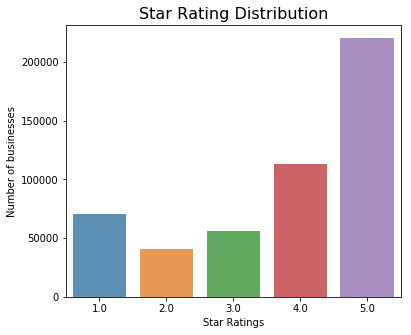

In [5]:
x=df_review['stars'].value_counts()
x=x.sort_index()

#plot star rating distribution
plt.figure(figsize=(6,5))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution", fontsize=16)
plt.ylabel('Number of businesses')
plt.xlabel('Star Ratings')

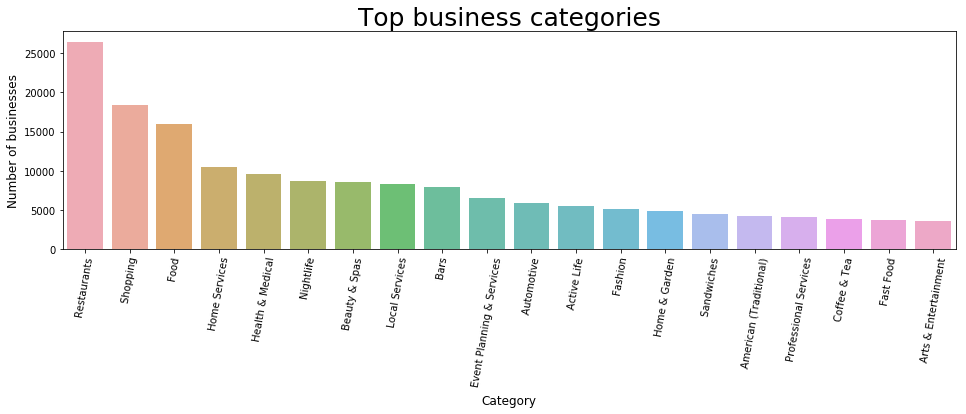

In [6]:
biz_cat = ''.join(df_biz['categories'].astype('str'))

cats=pd.DataFrame(biz_cat.split(','),columns=['categories'])

#prep for chart
x=cats.categories.value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("Top business categories",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

plt.show()

## **3. Select Variables and Convert into CSV**

Issues for consideration:<br>
Are we going to pick an industry, then work with the subset businesses? Or we do not consider the industry? e.g. cafe, restaurant, hair salon, etc.

In [8]:
# Replace business_id with businesss name
# Selected three variables: business_name, stars, text

df_comb=df_review.copy()
#df_comb['business_id'] = df_comb['business_id'].map(df_biz.set_index('business_id')['name'])
#df_comb = df_comb.rename(columns = {"business_id":"business_name"})[['business_name','stars','text']]

df_comb['business_name'] = df_comb['business_id'].map(df_biz.set_index('business_id')['name'])
df_comb = df_comb[['business_name','stars','text']]
df_comb

,business_name,stars,text
0,Bellagio Gallery of Fine Art,2.0,"As someone who has worked with many museums, I..."
1,Rio Hair Salon,1.0,I am actually horrified this place is still in...
2,Deagan's Kitchen & Bar,5.0,I love Deagan's. I do. I really do. The atmosp...
3,Cabo Mexican Restaurant,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
4,Raising Cane's Chicken Fingers,4.0,"Oh happy day, finally have a Canes near my cas..."
...,...,...,...
499995,Brew Tea Bar,5.0,"Other than Kung Fu Tea, I haven't had amazing ..."
499996,Brew Tea Bar,5.0,I wish they had one in the westside or for thi...
499997,Let's Meat Kbbq,5.0,This will be our new favorite spot. Dylan our ...
499998,Yummy Dumpling and BBQ,3.0,"3.5 Stars\n\nEnvironment: The decor is poor, f..."


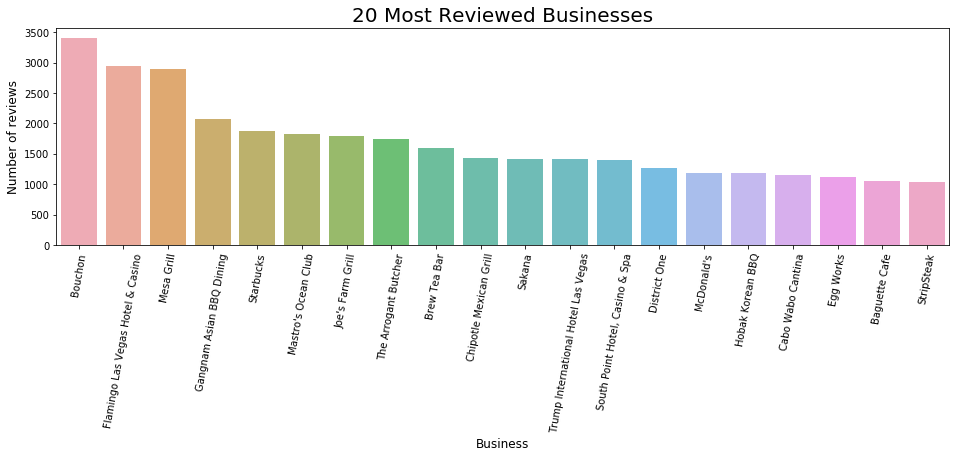

In [9]:
#plot 20 most reviewed business
x=df_comb['business_name'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#plot chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("20 Most Reviewed Businesses",fontsize=20)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Business', fontsize=12)
plt.show()

### Conversion into CSV

In [ ]:
#Convert review, business, user datasets into CSV
#df_review.to_csv('data/yelp_reviews.csv', index=False)
#df_biz.to_csv('data/yelp_business.csv', index=False)
#df_user.to_csv('data/yelp_user.csv', index=False)

## **4. Text Preprocessing**

#### **Preprocessing steps:**
Sentiment analysis:<br>
>a) Change to lower cases<Br>
>b) Remove HTML<br>
>c) Remove punctuation & Tokenize<br>
>d) Remove stop words<br>
>e) Lemmatization or Stemming<br>

In [11]:
df_comb['text']

0         As someone who has worked with many museums, I...
1         I am actually horrified this place is still in...
2         I love Deagan's. I do. I really do. The atmosp...
3         Dismal, lukewarm, defrosted-tasting "TexMex" g...
4         Oh happy day, finally have a Canes near my cas...
                                ...                        
499995    Other than Kung Fu Tea, I haven't had amazing ...
499996    I wish they had one in the westside or for thi...
499997    This will be our new favorite spot. Dylan our ...
499998    3.5 Stars\n\nEnvironment: The decor is poor, f...
499999    I want to tell everyone about an experience I ...
Name: text, Length: 500000, dtype: object

In [12]:
#limit the number of strings
df_pre=df_comb.copy()
df_pre

,business_name,stars,text
0,Bellagio Gallery of Fine Art,2.0,"As someone who has worked with many museums, I..."
1,Rio Hair Salon,1.0,I am actually horrified this place is still in...
2,Deagan's Kitchen & Bar,5.0,I love Deagan's. I do. I really do. The atmosp...
3,Cabo Mexican Restaurant,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
4,Raising Cane's Chicken Fingers,4.0,"Oh happy day, finally have a Canes near my cas..."
...,...,...,...
499995,Brew Tea Bar,5.0,"Other than Kung Fu Tea, I haven't had amazing ..."
499996,Brew Tea Bar,5.0,I wish they had one in the westside or for thi...
499997,Let's Meat Kbbq,5.0,This will be our new favorite spot. Dylan our ...
499998,Yummy Dumpling and BBQ,3.0,"3.5 Stars\n\nEnvironment: The decor is poor, f..."


In [13]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
#from tqdm import tqdm, notebook
from tqdm.auto import tqdm, trange
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import string
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

sentiment=True

def preprocess(s):
    if sentiment==True:
        #1. lowercase
        s = s.lower()
        #2. remove HTML
        soup = BeautifulSoup(s,'lxml')
        html_free = soup.get_text()
        #3. remove duplicate characters
        reg = re.sub(r'([a-z])\1+', r'\1', s)
        #3. Remove punctuation & Tokenize
        #cleanr = re.compile('<.*?>')
        #s = re.sub(cleanr, '', s)
        no_punct = "".join([c for c in reg if c not in string.punctuation])
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(no_punct)    
        # rem_url=re.sub(r'http\S+', '',cleantext)
        # rem_num = re.sub('[0-9]+', '', rem_url)
        #4. Remove stopwords
        filtered_words = [w for w in tokens if w not in stopwords.words('english')]
        #5. lemmatize/stem words
        final_words=[lemmatizer.lemmatize(w) for w in filtered_words]
        #final_words=[stemmer.stem(w) for w in filtered_words]
    else:
        #1. lowercase
        s = s.lower()
        #2. remove HTML
        soup = BeautifulSoup(s,'lxml')
        html_free = soup.get_text()
        #3. remove duplicate characters
        reg = re.sub(r'([a-z])\1+', r'\1', s)
        tokenizer = RegexpTokenizer(r'\w+')
        final_words = tokenizer.tokenize(reg)   
    return " ".join(final_words)

tqdm.pandas()
df_pre['text']=df_pre['text'].progress_map(lambda s:preprocess(s))

/usr/lib/python3/dist-packages/bs4/__init__.py:282: UserWarning: "http://www.abc15.com/dpp/news/region_phoenix_metro/north_phoenix/phoenix-wedding-venue-under-fire-for-violations

fyi!" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/lib/python3/dist-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You shouldprobably open this file and pass the filehandle intoBeautiful Soup.
  'Beautiful Soup.' % markup)
/usr/lib/python3/dist-packages/bs4/__init__.py:219: UserWarning: "b'..'" looks like a filename, not markup. You shouldprobably open this file and pass the filehandle intoBeautiful Soup.
  'Beautiful Soup.' % markup)


In [14]:
pd.DataFrame({'from': df_review['text'], 'to': df_pre['text']})

,from,to
0,"As someone who has worked with many museums, I...",someone worked many museum eager visit galery ...
1,I am actually horrified this place is still in...,actualy horified place stil busines 3 year old...
2,I love Deagan's. I do. I really do. The atmosp...,love deagans realy atmosphere cozy festive shr...
3,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",dismal lukewarm defrostedtasting texmex glop m...
4,"Oh happy day, finally have a Canes near my cas...",oh hapy day finaly cane near casa yes others g...
...,...,...
499995,"Other than Kung Fu Tea, I haven't had amazing ...",kung fu tea havent amazing boba long time firs...
499996,I wish they had one in the westside or for thi...,wish one westside case boba shop let start tar...
499997,This will be our new favorite spot. Dylan our ...,wil new favorite spot dylan waitres absolutely...
499998,"3.5 Stars\n\nEnvironment: The decor is poor, f...",35 star environment decor por flor sometimes o...


In [31]:
#df_comb=df_comb.drop(df_comb.columns[[0]], axis=1)
#df = df.drop(df.columns[[0, 1, 3]], axis=1)
df_comb_sm

,business_name,stars,text
0,Bellagio Gallery of Fine Art,2.0,someon work mani museum eager visit galleri re...
1,Rio Hair Salon,1.0,actual horrifi place still busi year old son n...
2,Deagan's Kitchen & Bar,5.0,love deagan realli atmosph cozi festiv shrimp ...
3,Cabo Mexican Restaurant,1.0,dismal lukewarm defrost tast texmex glop mumbl...
4,Raising Cane's Chicken Fingers,4.0,happi day final cane near casa gripe drive thr...
...,...,...,...
2999995,W Montréal,5.0,incred servic hotel contact local bakeri birth...
2999996,Bacchanal Buffet,1.0,god avoid oyster first wife stood line hour pa...
2999997,Güloglu,4.0,stumbl upon place yesterday drive marco panini...
2999998,Cold Beers & Cheeseburgers,1.0,one worst cold beer cheeseburg frequent one ol...


In [15]:
df_pre.to_csv('data/pre_yelp_500k.csv', index=False)

In [148]:
csv_df = pd.read_csv('data/yelp_pre.csv')
#csv_df.index +=1
#csv_df.drop(['Unnamed: 0'],axis=1)
csv_df

,business_id,business_name,stars,text
0,-MhfebM0QIsKt87iDN-FNw,Bellagio Gallery of Fine Art,2.0,as someone who has worked with many museums i ...
1,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,1.0,i am actually horrified this place is still in...
2,HQl28KMwrEKHqhFrrDqVNQ,Deagan's Kitchen & Bar,5.0,i love deagan s i do i really do the atmospher...
3,5JxlZaqCnk1MnbgRirs40Q,Cabo Mexican Restaurant,1.0,dismal lukewarm defrosted tasting texmex glop ...
4,IS4cv902ykd8wj1TR0N3-A,Raising Cane's Chicken Fingers,4.0,oh happy day finally have a canes near my casa...
...,...,...,...,...
499995,IhNASEZ3XnBHmuuVnWdIwA,Brew Tea Bar,5.0,other than kung fu tea i haven t had amazing b...
499996,IhNASEZ3XnBHmuuVnWdIwA,Brew Tea Bar,5.0,i wish they had one in the westside or for thi...
499997,7HbKKqXtZUjf6uVSHZ8wyw,Let's Meat Kbbq,5.0,this will be our new favorite spot dylan our w...
499998,DvelUmIuBmfbt95frynYsA,Yummy Dumpling and BBQ,3.0,3 5 stars environment the decor is poor floor ...


In [ ]:
df_comb['business_name'] = df_comb['business_id'].map(df_biz.set_index('business_id')['name'])
df_comb = df_comb[['business_id','business_name','stars','text']]
df_comb